In [1]:
import pickle

with open('mini_langid_v2.pkl', 'rb') as f:
    langid = pickle.load(f)
    
def get_langs(text):
    return dict(zip(langid.classes_, langid.predict_proba([text])[0]))

In [6]:
base_url = 'http://goloserzi.ru'

In [7]:
import requests
import random
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.auto import tqdm, trange
from heapdict import heapdict

In [8]:
downloaded_pages = dict()
urls_queue = {base_url}

In [18]:
for i in trange(1_000_000):
    if not urls_queue:
        break
    url = urls_queue.pop()
    
    if 'old.goloserzi.ru' in url:
        continue
    if url.startswith('mailto:'):
        continue
    if url.lower().endswith('.mp3') or url.lower().endswith('.jpg') or url.lower().endswith('.pdf'):
        continue
    
    print(url)
    html = requests.get(url).text
    downloaded_pages[url] = html
    soup = BeautifulSoup(html)

    for a in soup.findAll('a'):
        if not a.has_attr('href'):
            # skip anchors
            continue
        href = a['href']
        if href.startswith('#'):
            continue
        if not href.startswith('/') and not 'goloserzi.ru' in href:
            continue
            
        # print(a['href'])
        
        if href.startswith('/'):
            new_url = base_url + href
        else:
            new_url =  href
            
        
        if new_url not in downloaded_pages:
            urls_queue.add(new_url)
        

  0%|          | 0/1000000 [00:00<?, ?it/s]

http://goloserzi.ru/obshchestvo/deyatelnost/priglashaem-na-vystavku-mordovskikh-erzya-moksha-khudozhnikov-v-moskve-koy-obychay-/
http://goloserzi.ru/obshchestvo/novosti/?PAGEN_1=3
http://goloserzi.ru/obshchestvo/avtorskie-rubriki/novosti-na-erzyanskom-yazyke/vaygel-radionten-10-iet/
http://goloserzi.ru/etnos/istoriya/rannie-etapy-etnogeneza-finno-ugorskikh-narodov/
http://goloserzi.ru/obshchestvo/avtorskie-rubriki/kladovaya-erzyanskogo-slova/tashto-valt-drevnie-slova/
http://goloserzi.ru/obshchestvo/novosti/s-dnem-rossii/
http://goloserzi.ru/etnos/fotografii/v-y-festival-drevney-erzyanskoy-pesni-zov-torama-fotoalbom/
http://goloserzi.ru/obshchestvo/novosti/den-erzyanskogo-yazyka-1917-2017/
http://goloserzi.ru/etnos/?PAGEN_1=8
http://goloserzi.ru/obshchestvo/novosti/priglashaem-v-parakino-na-maslenichnye-gulyaniya/
http://goloserzi.ru/etnos/kukhnya/pyat-blyud-kotorye-nado-poprobovat-v-mordovii/
http://goloserzi.ru/obshchestvo/novosti/sevastopol-krym-rossiya/
http://goloserzi.ru/obshches

In [19]:
len(urls_queue)

0

In [20]:
len(downloaded_pages)

510

In [33]:
parsed_pages = []

for url in tqdm(downloaded_pages):
    if '?start=' in url:
        continue
    html = downloaded_pages[url]
    soup = BeautifulSoup(html)
    try:
        gw = soup.find('div', {'class': 'global-wrapper'})
        gw.find('div', {'class': 'side-menu'}).extract()
        body = gw.text
    except AttributeError:
        print(url)
        continue
    parsed_pages.append({
        'url': url,
        'body': body,
        'myv_score': get_langs(body)['myv']
    })

  0%|          | 0/510 [00:00<?, ?it/s]

http://old.goloserzi.ru/
http://goloserzi.ru/upload/iblock/73a/73af89bf9aa41e6a60584627cbff8716.JPG
http://goloserzi.ru/upload/iblock/08e/08e39f5e10978bd9eb7ac03ebeea0d06.JPG
http://goloserzi.ru/upload/iblock/12e/12eeabcc02dde8637196ac60441aa671.JPG
http://goloserzi.ru/upload/iblock/8d9/8d9ce044743edfde7dfcf609a1d55b0d.jpg
http://goloserzi.ru/upload/iblock/5e5/5e54658784945e3a8801b5b9ded0cbcc.jpg
http://goloserzi.ru/upload/iblock/e99/e99a3d9e18388a065981246b5683ab3a.jpg
http://goloserzi.ru/upload/iblock/f81/f8141442e551610113c8d2fa298f1ba9.jpg
http://goloserzi.ru/upload/iblock/294/2947e8cb3ac195ac5dc6c2c725935cb1.pdf
http://goloserzi.ru/upload/iblock/642/6425e7ea7077c516e71bd4957908481b.jpg
http://goloserzi.ru/upload/iblock/fbf/fbfd884e667928b745893b25fc32983b.jpg
http://goloserzi.ru/upload/iblock/491/491c01e9cd7ccc4471533dc104436f37.jpg
http://goloserzi.ru/upload/iblock/89f/89f8e034f69571b927cce12047226a12.jpg
http://goloserzi.ru/upload/iblock/73e/73e116ab34145f6877b0a05abcc447ee.JPG


In [44]:
soup = BeautifulSoup(html)

In [45]:
gw = soup.find('div', {'class': 'global-wrapper'})
gw.find('div', {'class': 'side-menu'}).extract()
gw.text

'\n\n\n\n\nГлавная\n\n\n\n\n\nОбщество\n\n\n\n\nНовости\n\n\n\n\n\n28 Июня 2017\n\n            1993        \n\n            Новости        \n\n\nЭрзянь лисьмапря. Что и как будет в этом году?\n\n\n\n\n\r\n\t Отдел культуры и спорта администрации Лукояновского муниципального района Нижегородской области и общественная организация «Местная национально-культурная автономия мордвы Лукояновского района Нижегородской области «Лисьмапря», приглашает Вас принять участие 22 июля 2017 года в VII Межрегиональном фестивале мордовской национальной культуры «ЭРЗЯНЬ ЛИСЬМАПРЯ» (в окрестностях села Новоселки на роднике "Кельмалисьмалеень Лисьмапря"). Просим Вас направить творческие коллективы на фестиваль, который\xa0 стал традиционным и собирает сотни людей со всей страны, хранящими эрзянскую и мокшанскую культуру. В торжественных мероприятиях принимают участие фольклорные коллективы, мастера-умельцы народных промыслов. Для гостей фестиваля будут проводиться спортивные состязания в национальном стиле.

In [34]:
print(len(parsed_pages))

474


In [35]:
df = pd.DataFrame(parsed_pages)

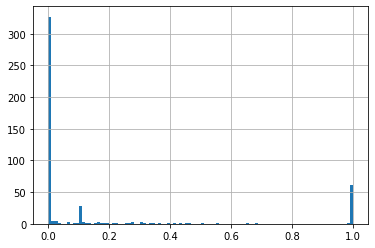

In [36]:
df.myv_score.hist(bins=100);

In [37]:
df[df.myv_score>0.5].shape

(68, 3)

In [42]:
pd.options.display.max_colwidth = 500

In [53]:
df[df.myv_score<0.5].sample(3)

,url,body,myv_score
348,http://goloserzi.ru/obshchestvo/deyatelnost/yunoshev-sergey-ivanovich-v-novom-proekte-moya-semya/,"\n\n\n\n\nГлавная\n\n\n\n\n\nОбщество\n\n\n\n\nДеятельность\n\n\n\n\n\n28 Января 2016\n\n 2642 \n\n Деятельность \n\n\nЮношев Сергей Иванович в новом проекте ""Моя семья""\n\n\n\n\n\r\n\t 28.01.16 года в Постпредстве Республики Мордовия состоялось открытие новой традиции в нашей московской общине по проведению ежемесячных встреч по теме «Моя семья». Формат мероприятия подразумевает знакомство с семейными архивами интересных людей, знающих своих предков, пони...",0.0
367,http://goloserzi.ru/etnos/istoriya/vkhozhdenie-v-sostav-rossiyskogo-gosudarstva-xiv-xvi-veka/,"\n\n\n\n\nГлавная\n\n\n\n\n\nЭтнос\n\n\n\n\nИстория\n\n\n\n\n\n26 Ноября 2015\n\n 19518 \n\n История \n\n\nВхождение в состав Российского государства (XIV-XVI века)\n\n\r\n\t К середине XV века не имевшая ни крепкой экономической базы, ни этнического единства и объединяемая лишь силой оружия, Золотая Орда окончательно распалась на несколько государств. Причерноморские степи и Крым составили владения Крымского ханства; низовья Волги — Астраханского; бассейн...",0.0
319,http://goloserzi.ru/etnos/simvolika/chuzhaya-meta-ruku-zhzhet/,"\n\n\n\n\nГлавная\n\n\n\n\n\nЭтнос\n\n\n\n\nСимволика\n\n\n\n\n\n27 Ноября 2015\n\n 3945 \n\n Символика \n\n\nЧужая мета руку жжет\n\n\n\n\n\r\n\t Мордовские магические знаки - «пазава», «тешкс», «серма» - интересовали ученых еще в 17 веке. Откуда они взялись, о чем рассказывают? Почему эти незамысловатые черточки, крестики, ромбы, которые ложатся то красной нитью на домотканую одежду, то еле заметной зарубкой на домашнюю утварь, так привлекают? Издавна ...",0.0


In [55]:
df[df.myv_score>0.5].shape

(68, 3)

In [65]:
df[df.myv_score>0.5].sample(3)

,url,body,myv_score
71,http://goloserzi.ru/obshchestvo/avtorskie-rubriki/zachinayu-pesn-o-mastorave/epicheskoe-skazanie-kilyava/,"\n\n\n\n\nГлавная\n\n\n\n\n\nОбщество\n\n\n\n\n\nАвторские рубрики\n\n\n\n\nЗачинаю песнь о Мастораве\n\n\n\n\n\n27 Февраля 2016\n\n 2603 \n\n Зачинаю песнь о Мастораве \n\n\nЭпическое сказание ""Килява""\n\nПоэтический перевод с эрзянского\r\nязыка Татьяны Ротановой (Фоминой)\nЭпическое сказание\r\n«Килява»\n \nОй,\r\nда высью, высью летят утки, \r\nОй, да выше выси летят гуси. \r\nОй, куда, куда есть опустятся? \r\nОй, куда, куда пить опустятся? \r\nНа зел...",1.0
170,http://goloserzi.ru/obshchestvo/avtorskie-rubriki/santyay-kulyat/vserossiyskaya-literaturnaya-premiya/,\n\n\n\n\nГлавная\n\n\n\n\n\nОбщество\n\n\n\n\n\nАвторские рубрики\n\n\n\n\nСантяй-кулят\n\n\n\n\n\n21 Февраля 2016\n\n 1891 \n\n Сантяй-кулят \n\n\nВсероссийская литературная премия\n\n\n\n\n\r\n\t Всероссийская литературная премия за лучший художественный перевод «Словес связующая нить» вручена 16 февраля в Москве коллективу переводчиков стихов Дмитрия Мизгулина «Когда-то солнце было Богом» с русского на финно-угорские языки. В торжественном мероприятии ...,1.0
200,http://goloserzi.ru/obshchestvo/avtorskie-rubriki/novoe-ot-tamary-bargovoy/erzyanskie-pesni-v-bolgarii/,"\n\n\n\n\nГлавная\n\n\n\n\n\nОбщество\n\n\n\n\n\nАвторские рубрики\n\n\n\n\nНовое от Тамары Барговой\n\n\n\n\n\n28 Июня 2016\n\n 1902 \n\n Новое от Тамары Барговой \n\n\nЭрзянские песни в Болгарии\n\n\n\n\n\r\n\t Разве могла я подумать, что буду петь наши эрзянские песни… в Болгарии?!\r\n\n\r\n\t А вот случилось! Дочь взяла путевку на отдых для двоих в Болгарию: для себя и для меня. Но у нее в жизни случились очень важные перемены: любимый позвал замуж. Ка...",1.0


In [62]:
get_langs(text)

{'myv': 1.0, 'ru': 5.427421370557627e-64}

The dataset is small and noisy, so I will not bother with it.

In [66]:
# df[df.myv_score>0.5].to_csv('other_sources/goloserzi.tsv', sep='\t', index=None)